# Predicting Home Prices in the State of Washington

## Introduction to Problem & Data

#### Problem Statement:
 For my final project, I want to develop a predictive model capable of accurately estimating housing prices in the United States, specifically in Washington. Factors such as location, square footage, number of bedrooms and bathrooms, and proximity to amenities significantly impact home values. This model will enable potential sellers to understand which features of their property contribute most to its price, allowing them to strategically enhance those aspects to maximize their returns. For example, sellers could focus on renovations or upgrades in high-impact areas such as kitchens, bathrooms, or curb appeal to attract buyers and increase property value.

#### Dataset Description:

Data for this project is sourced from Kaggle in csv format. The dataset offers a  variety of attributes that influence housing prices, such as the number of bedrooms, bathrooms, lot size, and year built. Some initial data preprocessing will be required, including handling missing values, removing redundant columns, and normalizing data for better interpretability and model performance.

While the dataset initially covers housing prices across the United States, this project focuses specifically on properties located in Washington state. This allows for a more region-specific analysis and eliminates the need for the "State" column, as all entries belong to the same state. Additionally, while the dataset includes the street address of each property, this feature will not directly impact price prediction since the location effects are already captured through the "City" and "Zip Code" columns, making the address unnecessary for the model. Also, the "Date" also wouldn't matter as the time of regiestering the data has no effect on the price. Not to mention, all of them are within a 3 month period. By refining the dataset in this way, the analysis will focus on features that are most likely to contribute to meaningful predictions while reducing noise from redundant or irrelevant information.

# **1)  Data Pre-Processing & Preliminary Examination:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# **2) Load the housing dataset**

In [ ]:
#load dataset
house_data = "https://raw.githubusercontent.com/SamuelChen2170/DataBootcampFinalProject/refs/heads/main/USA%20Housing%20Dataset.csv"
df = pd.read_csv(house_data)

In [ ]:
def categorize_house_size(df, column='sqft_living', bins=[0, 1000, 2000, float('inf')],
  labels=['Small', 'Medium', 'Large']):
  bins_global = [0, 1000, 2000, float('inf')]
labels_global = ['Small', 'Medium', 'Large']

Categorizing it is important size footage overpower every other variable hence it is important to see what other variables within the catgeories matter the most.

# **3) Data Overview**

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [ ]:
# Remove 'State' and 'Street Address' and 'Date' columns from the dataset
df = df.drop(columns=['country', 'street', 'date'], errors='ignore')

In [ ]:
#final dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4140 non-null   float64
 1   bedrooms       4140 non-null   float64
 2   bathrooms      4140 non-null   float64
 3   sqft_living    4140 non-null   int64  
 4   sqft_lot       4140 non-null   int64  
 5   floors         4140 non-null   float64
 6   waterfront     4140 non-null   int64  
 7   view           4140 non-null   int64  
 8   condition      4140 non-null   int64  
 9   sqft_above     4140 non-null   int64  
 10  sqft_basement  4140 non-null   int64  
 11  yr_built       4140 non-null   int64  
 12  yr_renovated   4140 non-null   int64  
 13  city           4140 non-null   object 
 14  statezip       4140 non-null   object 
dtypes: float64(4), int64(9), object(2)
memory usage: 485.3+ KB


In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


# **4) Data Dictionary**

- **`price`**: The sale price of the property in USD.
- **`bedrooms`**: Number of bedrooms in the property.
- **`bathrooms`**: Number of bathrooms in the property.
- **`sqft_living`**: Total square footage of the living area inside the property.
- **`house_size_category`**:sqft_living Categorized
- **`sqft_lot`**: Total square footage of the lot area.
- **`floors`**: Number of floors in the property.
- **`waterfront`**: Binary indicator:
  - 1 = Property has a waterfront view.
  - 0 = No waterfront view.
- **`view`**: Index (0-4) indicating the quality of the property’s view. Higher values indicate better views.
- **`condition`**: Index (1-5) rating the overall condition of the property. Higher values indicate better condition.
- **`sqft_above`**: Square footage of the property above the basement level.
- **`sqft_basement`**: Square footage of the basement area.
- **`yr_built`**: The year the property was built.
- **`yr_renovated`**: The year the property was last renovated. A value of `0` indicates no renovations.
- **`city`**: City where the property is located.
- **`statezip`**: State and ZIP code of the property



# **5) Exploratory Data Analysis**

**Since there is 15 features, it would be easier to divide the 15 features into logical groups based on their characteristics. Here are the following categories:**


### **5.1) Target Variable**
- **`price`**: The variable you aim to predict.


### **5.2) Temporal Features**
- **`yr_built`**: The year the property was built.
- **`yr_renovated`**: The year the property was last renovated.

### **5.3) Numeric Features**
- **`bedrooms`**: Number of bedrooms.
- **`bathrooms`**: Number of bathrooms.
- **`sqft_living`**: Square footage of the living area.
- **`house_size_category`**: Square footage of the living area categorized.
- **`sqft_lot`**: Square footage of the lot.
- **`floors`**: Number of floors in the property.
- **`sqft_above`**: Square footage above ground.
- **`sqft_basement`**: Square footage of the basement.

### **5.4) Categorical Features**
- **`waterfront`**: Binary indicator (1 = Waterfront, 0 = No Waterfront).
- **`view`**: Index (0–4) indicating the quality of the view.
- **`condition`**: Index (1–5) rating the condition of the property.
- **`city`**: City where the property is located.
- **`statezip`**: State and ZIP code.




# **5.1) Target Variable**

### **The distribution of property prices.**

**Histogram of the property prices**

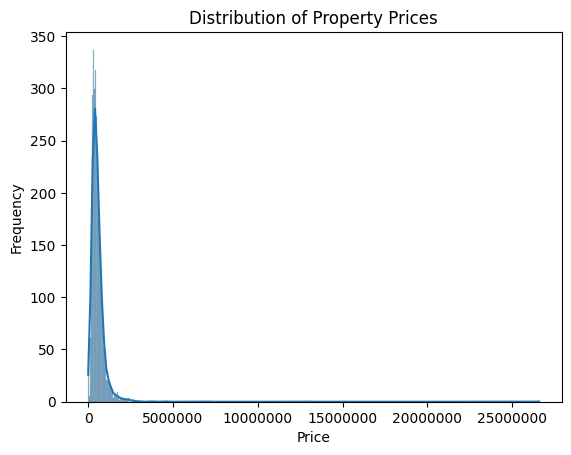

In [ ]:
# Plot the distribution of property prices
plt.ticklabel_format(style='plain', axis='x')
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Distribution of Property Prices: The histogram shows a right-skewed distribution of property prices with most values clustered toward the lower end. This indicates a majority of properties have lower prices, with fewer high-end outliers.

**For better visualization, the following is a logged histogram of property prices.**

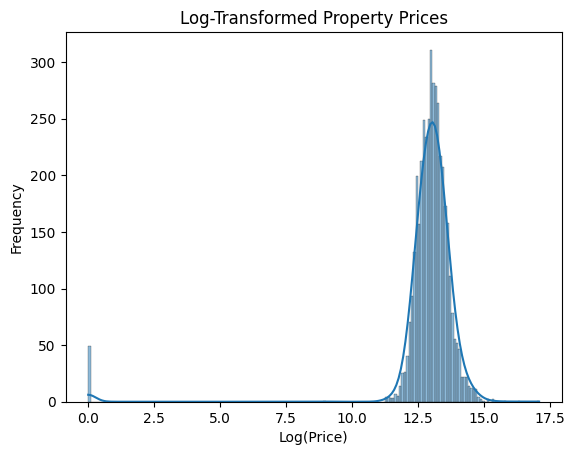

In [ ]:
df['log_price'] = np.log1p(df['price'])  # log(1 + price) to handle 0 or near-zero values
sns.histplot(df['log_price'], kde=True)
plt.title('Log-Transformed Property Prices')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

Log-Transformed Property Prices: Applying a log transformation normalizes the property price distribution, making it more symmetric.

**Violin plot of property prices**

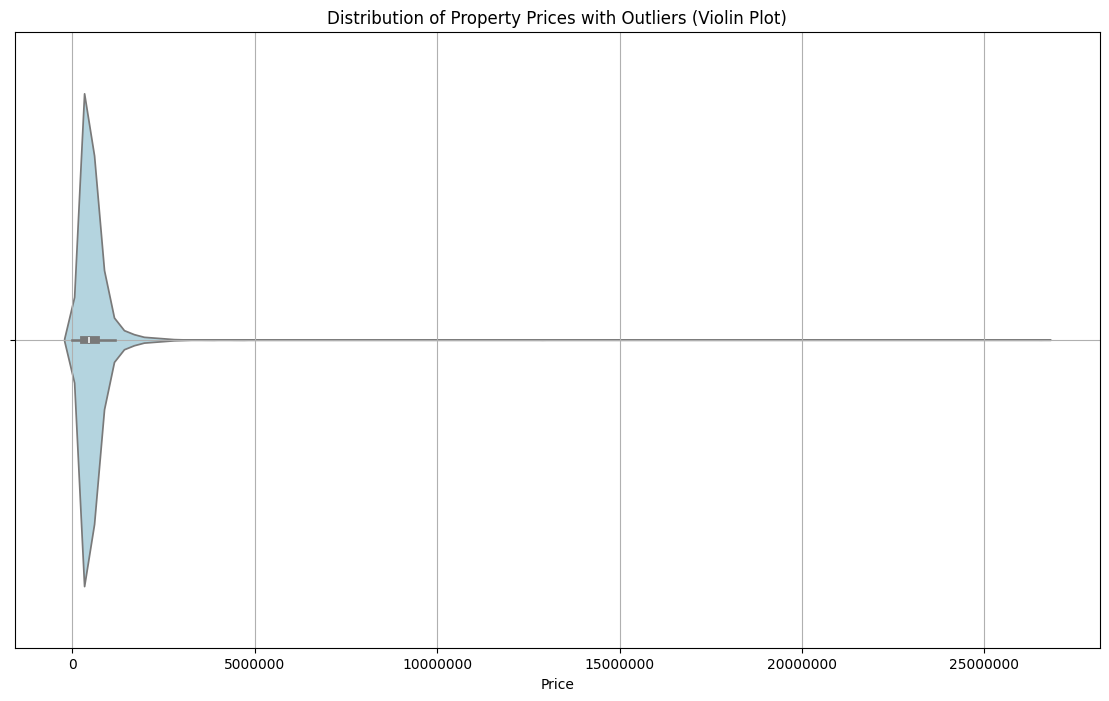

In [ ]:
# Create a violin plot for property prices
plt.figure(figsize=(14, 8))
sns.violinplot(x=df['price'], color='lightblue')
plt.title('Distribution of Property Prices with Outliers (Violin Plot)')
plt.xlabel('Price')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')  # Disable scientific notation for better readability
plt.show()

Violin Plot of Property Prices: The violin plot captures the spread of property prices, including outliers. It emphasizes that most properties are priced within a narrow range while visualizing outliers clearly.

**For better visualization, the following is a logged violin plot of property prices.**

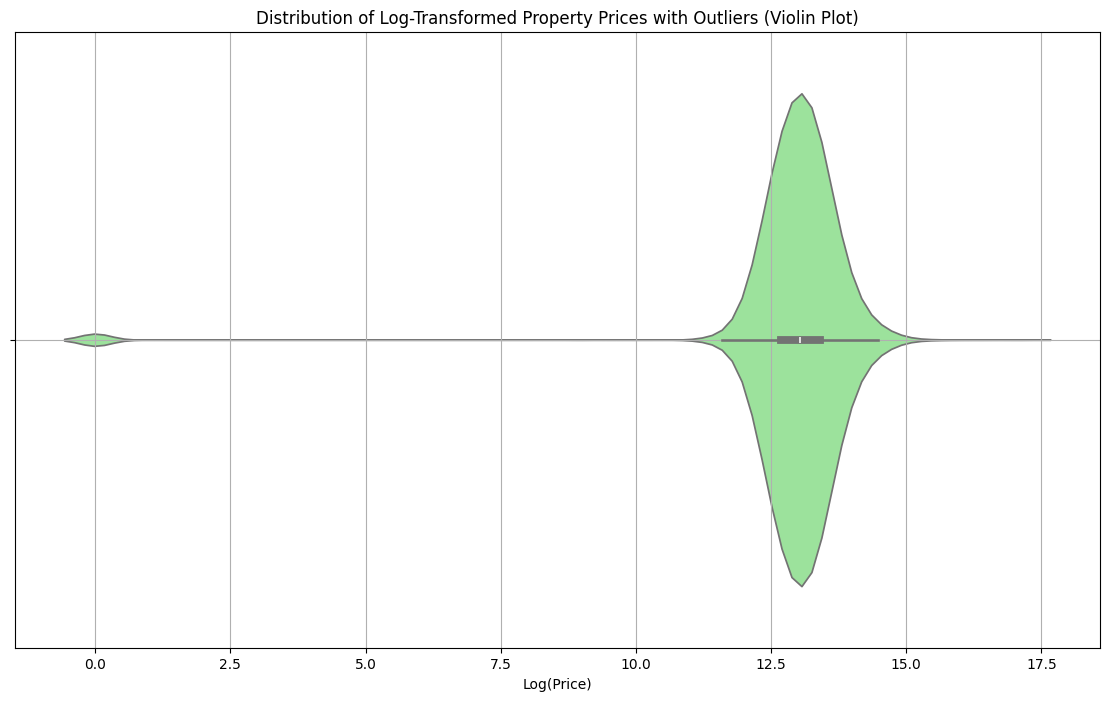

In [ ]:
#Apply log transformation to the property prices
df['log_price'] = np.log1p(df['price'])  # Use log(1 + price) to handle zero or near-zero values

# Create a violin plot for log-transformed property prices
plt.figure(figsize=(14, 8))
sns.violinplot(x=df['log_price'], color='lightgreen')
plt.title('Distribution of Log-Transformed Property Prices with Outliers (Violin Plot)')
plt.xlabel('Log(Price)')
plt.grid(True)
plt.show()

Violin Plot of Log-Transformed Property Prices: The violin plot for log-transformed prices illustrates a more condensed distribution, highlighting the normalization effect and a better representation of the central tendency.

### **Segmentation by property price ranges.**

---





**- Affordable: $ 0 - 500,000**

**- Mid-Range: $ 500,000 - 1,000,000**

**- High-End: $ 1,000,000 +**

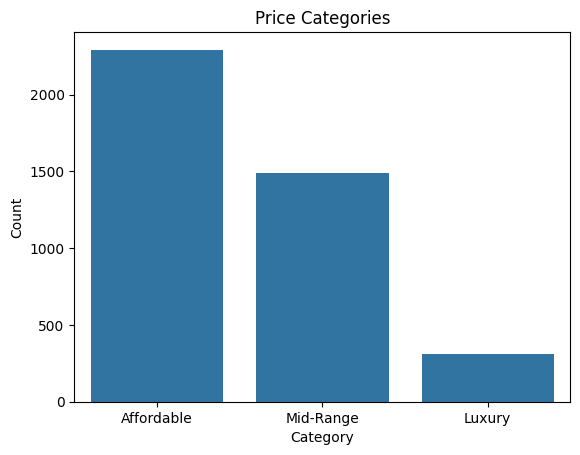

In [ ]:
df['price_category'] = pd.cut(df['price'], bins=[0, 500000, 1000000, df['price'].max()], labels=['Affordable', 'Mid-Range', 'Luxury'])

sns.countplot(x='price_category', data=df)
plt.title('Price Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

This bar chart categorizes properties into three price ranges: Affordable , Mid Range, and Luxury. The majority of properties fall into the Affordable category, with significantly fewer in the Mid-Range and only a small fraction in the Luxury category. This distribution indicates a market primarily composed of lower-priced properties, with high-end options being much less common.

### **Outliers in property prices.**

**Outliers of property prices**

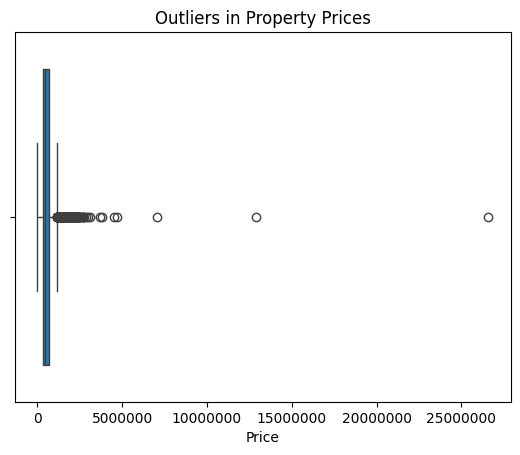

In [ ]:
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df['price'])
plt.title('Outliers in Property Prices')
plt.xlabel('Price')
plt.show()

This boxplot illustrates the presence of outliers in property prices. The majority of property prices are concentrated within a smaller range near the lower end of the scale, but there are a number of high-priced outliers that significantly exceed the typical price range, reaching into the millions. These outliers indicate properties that are likely high-end or luxury listings, standing apart from the general distribution.

**For better visualization, the following is a logged graph of the outliers in property prices.**

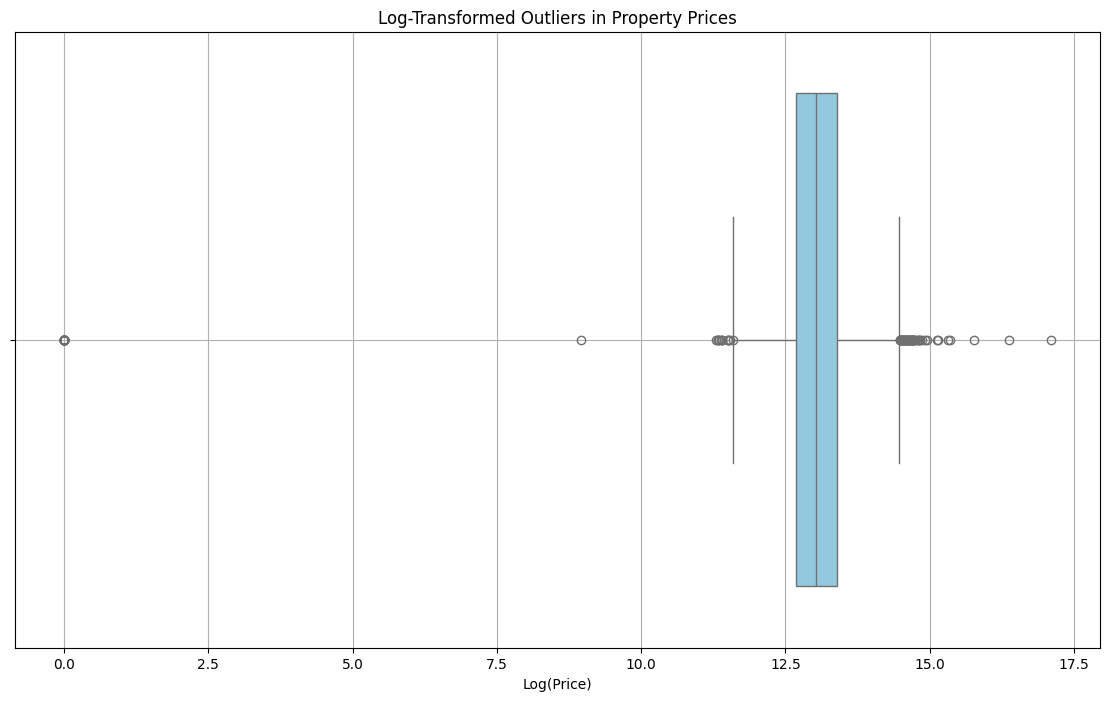

In [ ]:
# Apply log transformation to reduce the skewness in price distribution
df['log_price'] = np.log1p(df['price'])  # log(1 + price) to handle zero or near-zero values
plt.figure(figsize=(14, 8))
sns.boxplot(x=df['log_price'], color='skyblue')
plt.title('Log-Transformed Outliers in Property Prices')
plt.xlabel('Log(Price)')
plt.grid(True)
plt.show()

This boxplot showcases the log-transformed property prices to better visualize outliers. The transformation compresses the range of values, making it easier to observe the spread of data while highlighting extreme values. The majority of prices are concentrated within a narrower band, but several points still lie far beyond the main distribution, indicating significant outliers in high-value properties.

### **Summary of Property Price Analysis**

**1) Distribution of Property Prices:**
- The distribution of property prices is highly skewed, with most properties falling within the lower price range.
- A small number of high-priced properties significantly influence the overall distribution, creating a long tail.
- Log transformation was applied to reduce skewness and better represent the data distribution for analysis.


**2) Segmentation by Property Price Ranges:**
- Properties were segmented into categories such as Affordable, Mid-Range, and Luxury.
- The majority of properties fall under the Affordable and Mid-Range categories, with fewer in the Luxury segment.
- This segmentation highlights the concentration of housing supply in lower and mid-price ranges.


**3) Outliers in Property Prices:**
- A boxplot revealed significant outliers in property prices, with extreme values exceeding several million dollars.
- These outliers may represent luxury or waterfront properties and could distort the results of certain models.
- Proper handling of these outliers, such as capping or excluding them, will be necessary for predictive modeling to avoid overfitting.

# **5.2) Temporal Features**

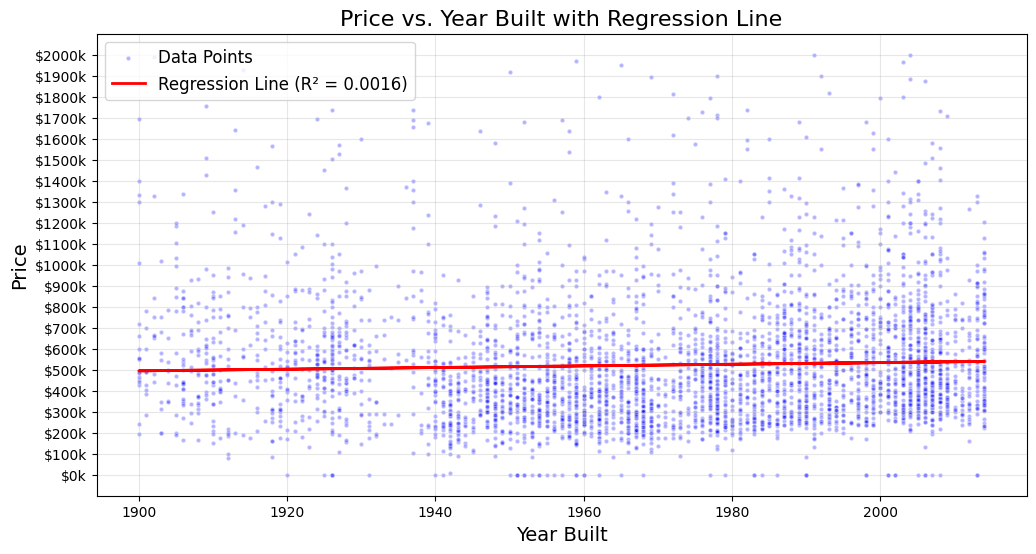

In [ ]:
# Plot Price vs. Year Built with a regression line and calculate R²
filtered_df = df[df['price'] <= 2000000]

X = filtered_df['yr_built'].values.reshape(-1, 1)
y = filtered_df['price'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r_squared = model.score(X, y)
r_squared_rounded = round(r_squared, 4)

plt.figure(figsize=(12, 6))
plt.scatter(filtered_df['yr_built'], filtered_df['price'], alpha=0.3, c='blue', s=10, edgecolor='w', label='Data Points')
plt.plot(filtered_df['yr_built'], y_pred, color='red', linewidth=2, label=f'Regression Line (R² = {r_squared_rounded})')

plt.title('Price vs. Year Built with Regression Line', fontsize=16)
plt.xlabel('Year Built', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(alpha=0.3)
plt.yticks(ticks=range(0, 2100000, 100000), labels=[f"${x//1000}k" for x in range(0, 2100000, 100000)])
plt.legend(fontsize=12)
plt.show()

This scatterplot examines the relationship between the year a property was built and its price. The regression line suggests a very weak positive correlation, as indicated by an R² value of 0.0016, demonstrating that the year built has almost no explanatory power for property prices. The data points are widely scattered, reflecting significant variability in prices regardless of construction year.

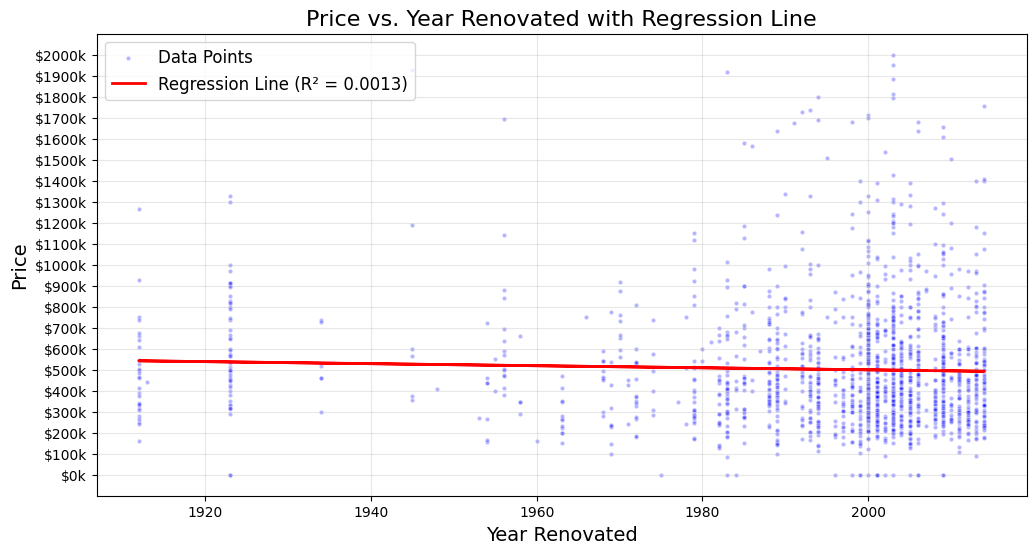

In [ ]:
# Plot Price vs. Year Renovated with a regression line and calculate R²

filtered_df = df[df['price'] <= 2000000]
filtered_df = filtered_df[filtered_df['yr_renovated'] > 0]  # Filter out properties with no renovations

X = filtered_df['yr_renovated'].values.reshape(-1, 1)
y = filtered_df['price'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r_squared_rounded = round(model.score(X, y), 4)

plt.figure(figsize=(12, 6))
plt.scatter(filtered_df['yr_renovated'], filtered_df['price'], alpha=0.3, c='blue', s=10, edgecolor='w', label='Data Points')
plt.plot(filtered_df['yr_renovated'], y_pred, color='red', linewidth=2, label=f'Regression Line (R² = {r_squared_rounded})')

plt.title('Price vs. Year Renovated with Regression Line', fontsize=16)
plt.xlabel('Year Renovated', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(alpha=0.3)
plt.yticks(ticks=range(0, 2100000, 100000), labels=[f"${x//1000}k" for x in range(0, 2100000, 100000)])
plt.legend(fontsize=12)
plt.show()

This scatterplot examines the relationship between the year a property was renovated and its price. The regression line reveals an extremely weak negative correlation, as indicated by an R² value of 0.0013. This suggests that the year of renovation has almost no impact on property prices, and the data points show a wide variability in price regardless of the renovation year.

<ipython-input-374-32efc2c7683f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['time_diff_renovated_built'] = filtered_df['yr_renovated'] - filtered_df['yr_built']


Intercept: 460942.501365489
Coefficient for Time Difference Between Built and Renovated: 751.6261400382285
R² Value: 0.0034


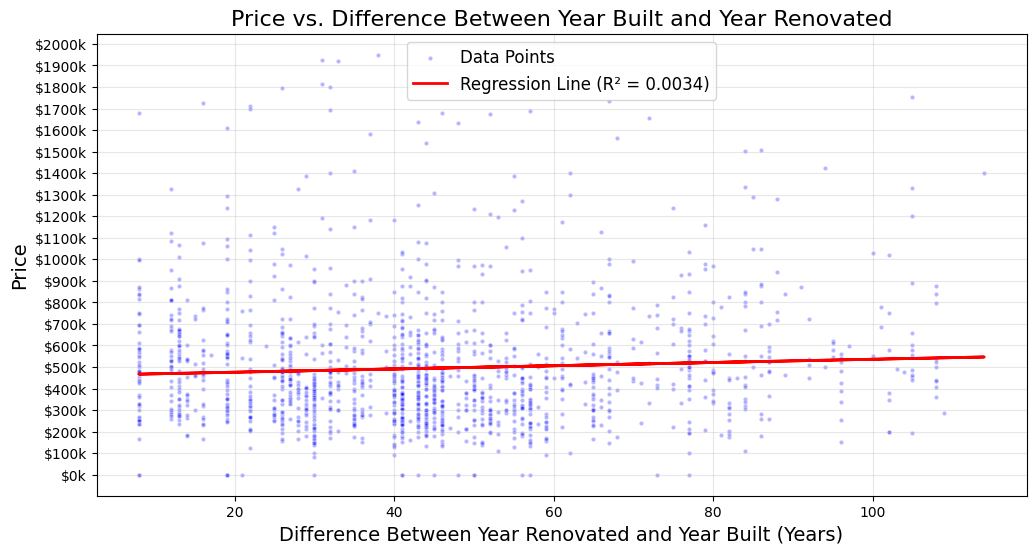

In [ ]:
# Analyze the difference between Year Built and Year Renovated vs. Price

filtered_df = df[df['price'] <= 2000000]
filtered_df['time_diff_renovated_built'] = filtered_df['yr_renovated'] - filtered_df['yr_built']
filtered_df = filtered_df[filtered_df['time_diff_renovated_built'] > 0]

X = filtered_df['time_diff_renovated_built'].values.reshape(-1, 1)
y = filtered_df['price'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r_squared = round(model.score(X, y), 4)
slope = model.coef_[0]
intercept = model.intercept_

print(f"Intercept: {intercept}")
print(f"Coefficient for Time Difference Between Built and Renovated: {slope}")
print(f"R² Value: {r_squared}")

plt.figure(figsize=(12, 6))
plt.scatter(filtered_df['time_diff_renovated_built'], filtered_df['price'], alpha=0.3, c='blue', s=10, edgecolor='w', label='Data Points')
plt.plot(filtered_df['time_diff_renovated_built'], y_pred, color='red', linewidth=2, label=f'Regression Line (R² = {r_squared})')

plt.title('Price vs. Difference Between Year Built and Year Renovated', fontsize=16)
plt.xlabel('Difference Between Year Renovated and Year Built (Years)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(alpha=0.3)
plt.yticks(ticks=range(0, 2100000, 100000), labels=[f"${x//1000}k" for x in range(0, 2100000, 100000)])
plt.legend(fontsize=12)
plt.show()

This scatterplot explores the relationship between the difference in years between when a property was built and when it was renovated, and its price. The regression line shows a very weak positive correlation with an R² value of 0.0034. This indicates that the difference in years between building and renovation has an insignificant impact on property prices, with most data points showing substantial variability regardless of this time difference.

### **Summary of Temporal Features Analysis**


**1) Year Built:**
   - The relationship between the year a property was built and its price is extremely weak, with an R² value of 0.0016.
   - The scatterplot shows a wide distribution of prices across all years, indicating no clear trend or significant influence of construction year on property prices.

**2) Year Renovated:**
   - Renovation year has minimal impact on property prices, as reflected by an R² value of 0.0013.
   - Properties renovated in different years show similar price ranges, suggesting that renovation year alone is not a reliable predictor of price.

**3) Difference Between Year Built and Year Renovated:**
   - The time difference between a property’s construction and renovation year has a negligible relationship to price, with an R² value of 0.0034.
   - While the regression line shows a slight upward trend, the variation in prices across all differences indicates that this feature has limited explanatory power.

**4) Insights:**
   - Temporal features such as year built, year renovated, and their difference have a weak influence on property prices.
   - These features may be more valuable in combination with other variables, such as condition, location, or architectural style, to better understand their role in price determination.

# **5.3) Numeric Features**

<ipython-input-375-6f05fddf0199>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = filtered_df.groupby('house_size_category')['price'].mean().reset_index()


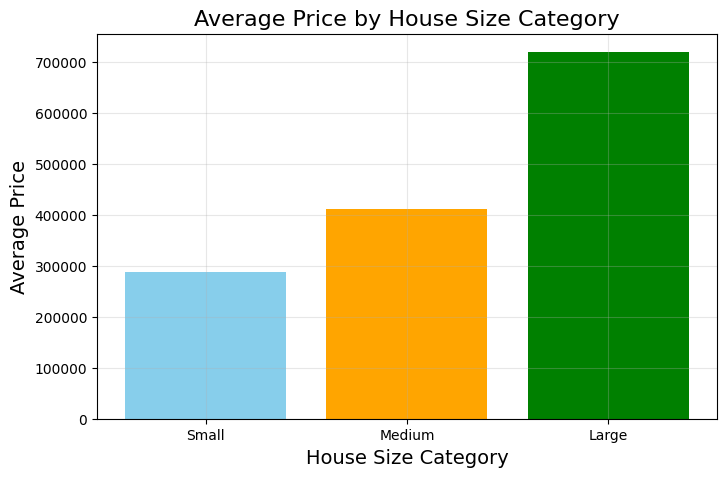

In [ ]:
# Average Price by House Size Category
filtered_df = df.copy()  # Replace 'df' with the correct DataFrame name
bins = [0, 1000, 2000, float('inf')]
labels = ['Small', 'Medium', 'Large']

filtered_df['house_size_category'] = pd.cut(filtered_df['sqft_living'], bins=bins, labels=labels)

all_categories = ['Small', 'Medium', 'Large']
filtered_df['house_size_category'] = pd.Categorical(filtered_df['house_size_category'], categories=all_categories)

grouped = filtered_df.groupby('house_size_category')['price'].mean().reset_index()

grouped['price'] = grouped['price'].fillna(0)

plt.figure(figsize=(8, 5))
plt.bar(grouped['house_size_category'], grouped['price'], color=['skyblue', 'orange', 'green'])

plt.title('Average Price by House Size Category', fontsize=16)
plt.xlabel('House Size Category', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

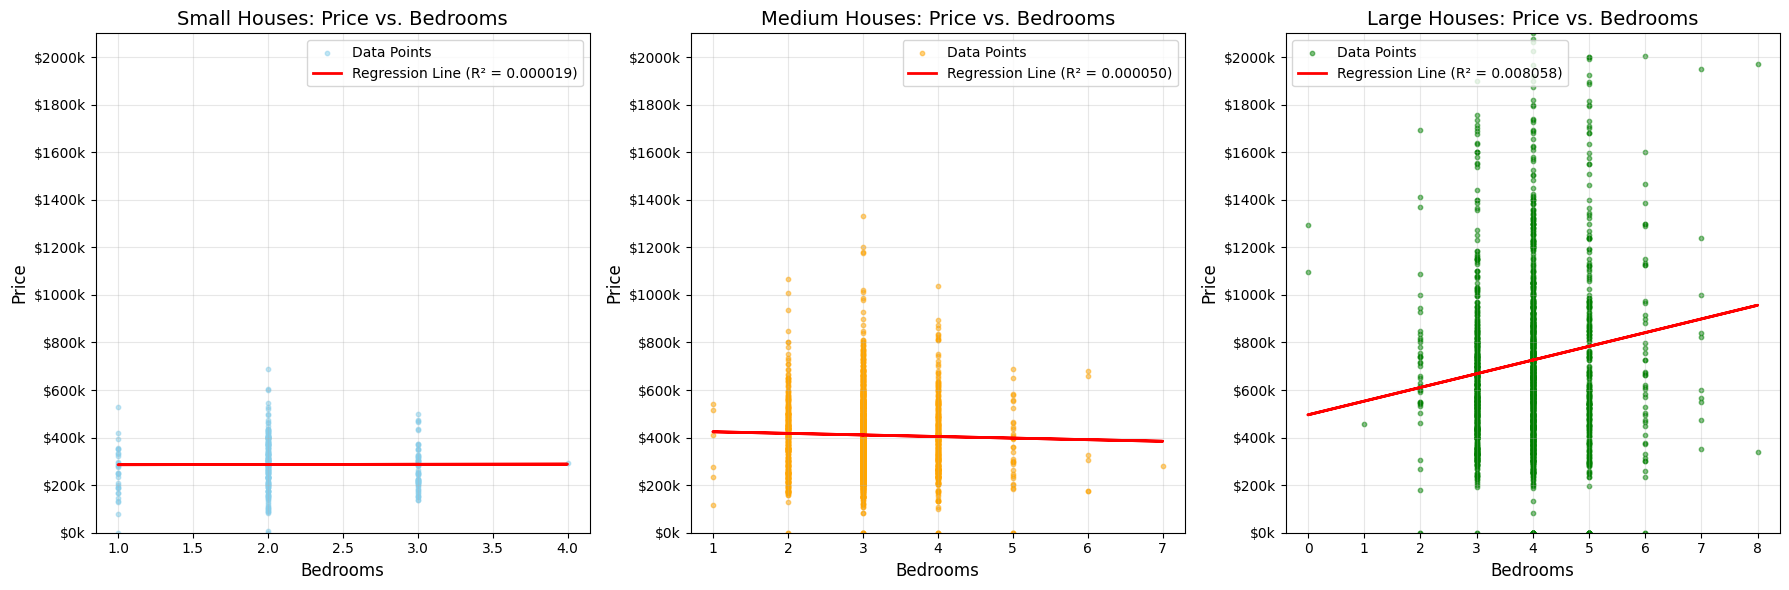

In [ ]:
# Price vs. Bedrooms with Regression Line

categories = ['Small', 'Medium', 'Large']
colors = ['skyblue', 'orange', 'green']

plt.figure(figsize=(18, 6))

for i, category in enumerate(categories):
    plt.subplot(1, 3, i + 1)
    filtered_category = filtered_df[filtered_df['house_size_category'] == category]
    X = filtered_category['bedrooms'].values.reshape(-1, 1)
    y = filtered_category['price'].values

    if len(np.unique(X)) > 1 and len(X) > 1:  # Ensure there’s enough data for regression
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)

        # Format R² to six decimal places without scientific notation
        r_squared = f"{model.score(X, y):.6f}"

        plt.scatter(X, y, alpha=0.5, c=colors[i], s=10, label='Data Points')
        plt.plot(X, y_pred, color='red', linewidth=2, label=f'Regression Line (R² = {r_squared})')
    else:
        plt.scatter(X, y, alpha=0.5, c=colors[i], s=10, label='Data Points')
        plt.text(0.5, 0.5, 'Insufficient Data', fontsize=12, ha='center', transform=plt.gca().transAxes)

    plt.title(f'{category} Houses: Price vs. Bedrooms', fontsize=14)
    plt.xlabel('Bedrooms', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.ylim(0, 2100000)
    plt.grid(alpha=0.3)
    plt.yticks(ticks=range(0, 2100000, 200000), labels=[f"${x//1000}k" for x in range(0, 2100000, 200000)])
    plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

For **Small** and **Medium Houses**, the number of bedrooms has almost no impact on price, as indicated by extremely low \( R^2 \) values close to zero. For **Large Houses**, there is a slight positive correlation between bedrooms and price, but the \( R^2 \) value of 0.008 suggests the relationship remains very weak.

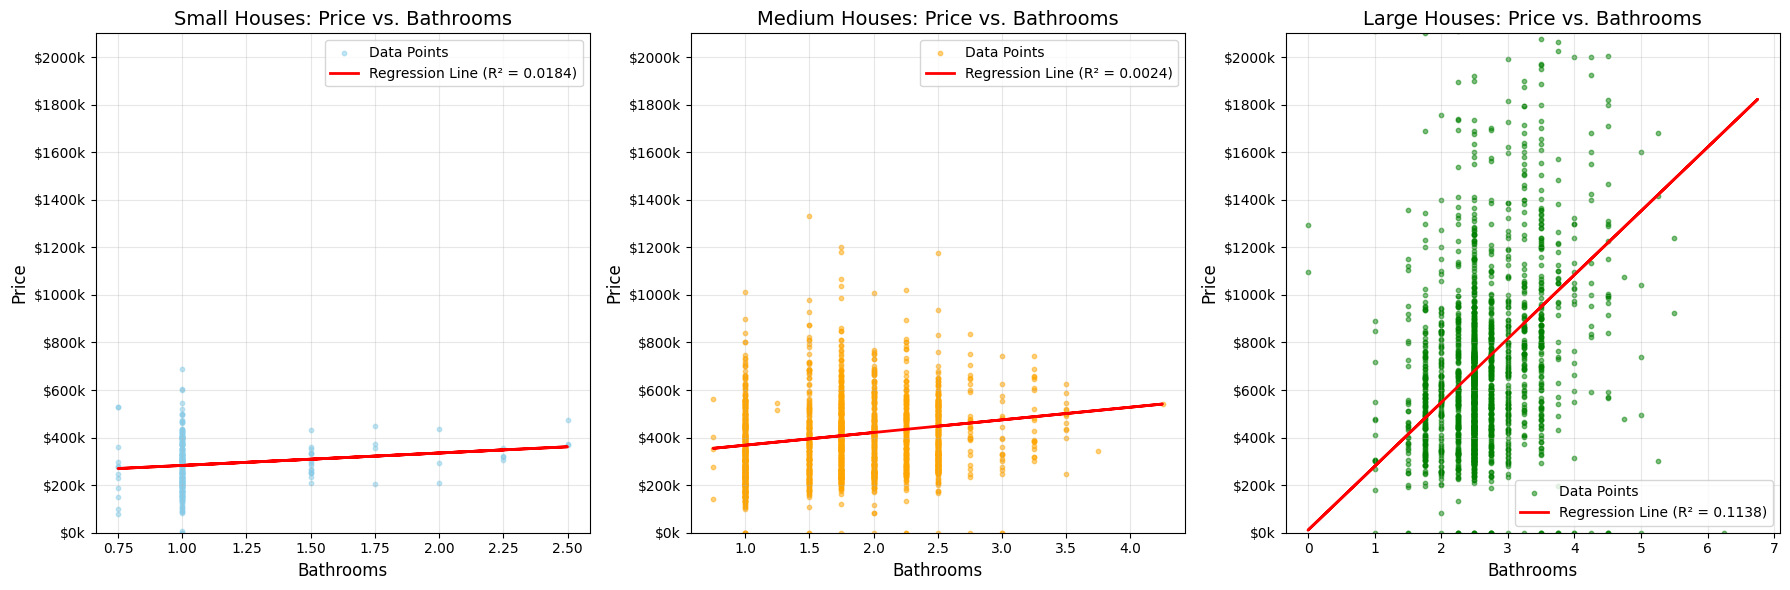

In [ ]:
# Price vs. Bathrooms with Regression Line

categories = ['Small', 'Medium', 'Large']
colors = ['skyblue', 'orange', 'green']

plt.figure(figsize=(18, 6))

for i, category in enumerate(categories):
    plt.subplot(1, 3, i + 1)
    filtered_category = filtered_df[filtered_df['house_size_category'] == category]
    X = filtered_category['bathrooms'].values.reshape(-1, 1)
    y = filtered_category['price'].values

    if len(X) > 0:
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r_squared = round(model.score(X, y), 4)

        plt.scatter(X, y, alpha=0.5, c=colors[i], s=10, label='Data Points')
        plt.plot(X, y_pred, color='red', linewidth=2, label=f'Regression Line (R² = {r_squared})')

    plt.title(f'{category} Houses: Price vs. Bathrooms', fontsize=14)
    plt.xlabel('Bathrooms', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.ylim(0, 2100000)
    plt.grid(alpha=0.3)
    plt.legend(fontsize=10)
    plt.yticks(ticks=range(0, 2100000, 200000), labels=[f"${x//1000}k" for x in range(0, 2100000, 200000)])

plt.tight_layout()
plt.show()

For **Small Houses**, the number of bathrooms has minimal influence on price with an \( R^2 \) of 0.0184. In **Medium Houses**, there is still a very weak correlation (\( R^2 = 0.0024 \)). However, for **Large Houses**, the relationship becomes more noticeable with an \( R^2 \) of 0.1138, indicating bathrooms have a stronger positive impact on price in larger homes.

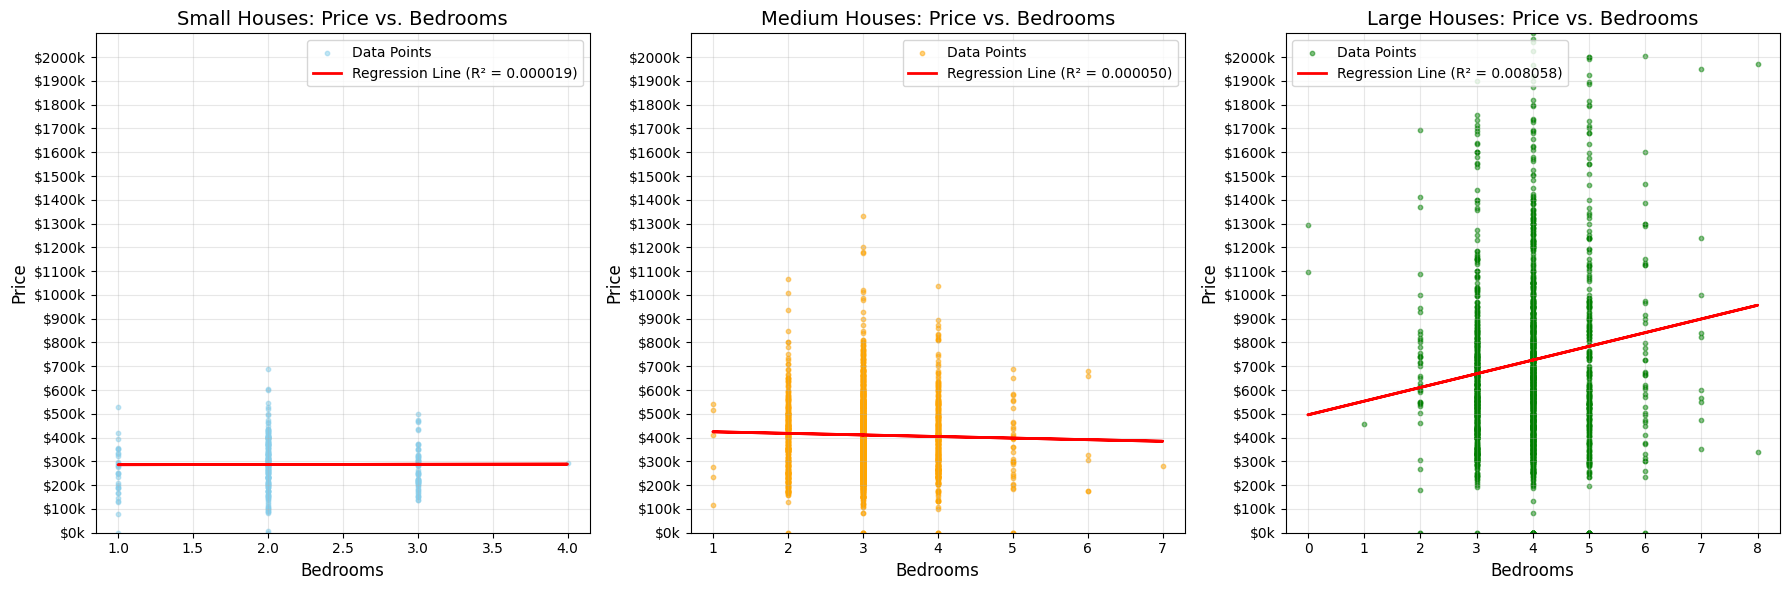

In [ ]:
# Price vs. Square Footage of Lot with Regression Line
categories = ['Small', 'Medium', 'Large']
colors = ['skyblue', 'orange', 'green']

plt.figure(figsize=(18, 6))

for i, category in enumerate(categories):
    plt.subplot(1, 3, i + 1)
    filtered_category = filtered_df[filtered_df['house_size_category'] == category]
    X = filtered_category['bedrooms'].values.reshape(-1, 1)
    y = filtered_category['price'].values

    if len(np.unique(X)) > 1 and len(X) > 1:  # Ensure valid regression data
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r_squared = f"{model.score(X, y):.6f}"  # Fixed-point format, no scientific notation

        plt.scatter(X, y, alpha=0.5, c=colors[i], s=10, label='Data Points')
        plt.plot(X, y_pred, color='red', linewidth=2, label=f'Regression Line (R² = {r_squared})')
    else:
        plt.scatter(X, y, alpha=0.5, c=colors[i], s=10, label='Data Points')
        plt.text(0.5, 0.5, 'Insufficient Data', fontsize=12, ha='center', transform=plt.gca().transAxes)

    plt.title(f'{category} Houses: Price vs. Bedrooms', fontsize=14)
    plt.xlabel('Bedrooms', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.yticks(ticks=range(0, 2100000, 100000), labels=[f"${x//1000}k" for x in range(0, 2100000, 100000)])
    plt.ylim(0, 2100000)
    plt.grid(alpha=0.3)
    plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

For **Small Houses**, the number of bedrooms has no meaningful impact on price (\( R^2 = 0.000019 \)). In **Medium Houses**, the relationship remains negligible (\( R^2 = 0.000050 \)). For **Large Houses**, there is a slight positive correlation between the number of bedrooms and price with \( R^2 = 0.008058 \), though the effect is still weak.

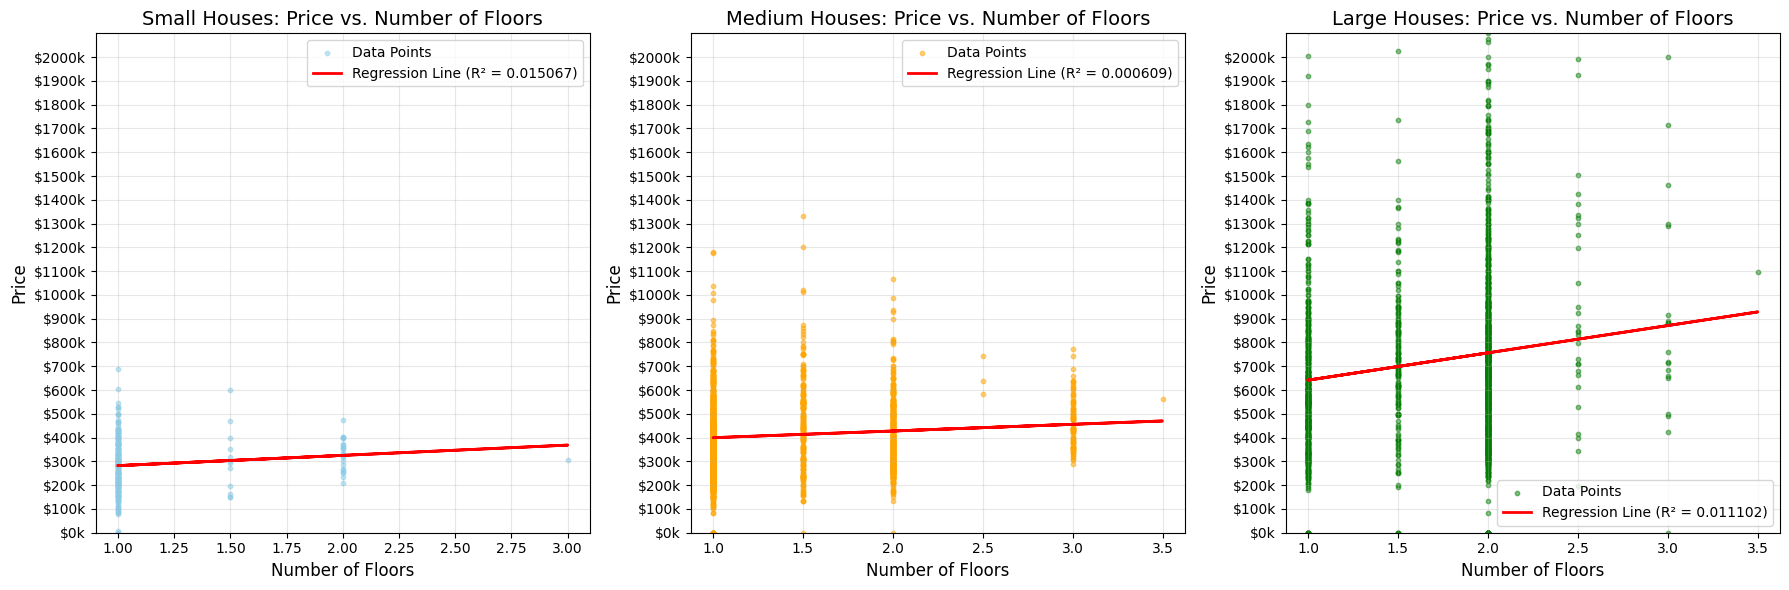

In [ ]:
# Price vs. Number of Floors with Regression Line
categories = ['Small', 'Medium', 'Large']
colors = ['skyblue', 'orange', 'green']

plt.figure(figsize=(18, 6))

for i, category in enumerate(categories):
    plt.subplot(1, 3, i + 1)
    filtered_category = filtered_df[filtered_df['house_size_category'] == category]
    X = filtered_category['floors'].values.reshape(-1, 1)
    y = filtered_category['price'].values

    if len(np.unique(X)) > 1 and len(X) > 1:  # Ensure valid regression data
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r_squared = f"{model.score(X, y):.6f}"  # Fixed-point format, no scientific notation

        plt.scatter(X, y, alpha=0.5, c=colors[i], s=10, label='Data Points')
        plt.plot(X, y_pred, color='red', linewidth=2, label=f'Regression Line (R² = {r_squared})')
    else:
        plt.scatter(X, y, alpha=0.5, c=colors[i], s=10, label='Data Points')
        plt.text(0.5, 0.5, 'Insufficient Data', fontsize=12, ha='center', transform=plt.gca().transAxes)

    plt.title(f'{category} Houses: Price vs. Number of Floors', fontsize=14)
    plt.xlabel('Number of Floors', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.yticks(ticks=range(0, 2100000, 100000), labels=[f"${x//1000}k" for x in range(0, 2100000, 100000)])
    plt.ylim(0, 2100000)
    plt.grid(alpha=0.3)
    plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

For **Small Houses**, the number of floors has a minimal impact on price (\( R^2 = 0.015067 \)). In **Medium Houses**, the relationship is nearly negligible (\( R^2 = 0.000609 \)). For **Large Houses**, there is a slight positive correlation between the number of floors and price, but the effect remains weak (\( R^2 = 0.011102 \)).

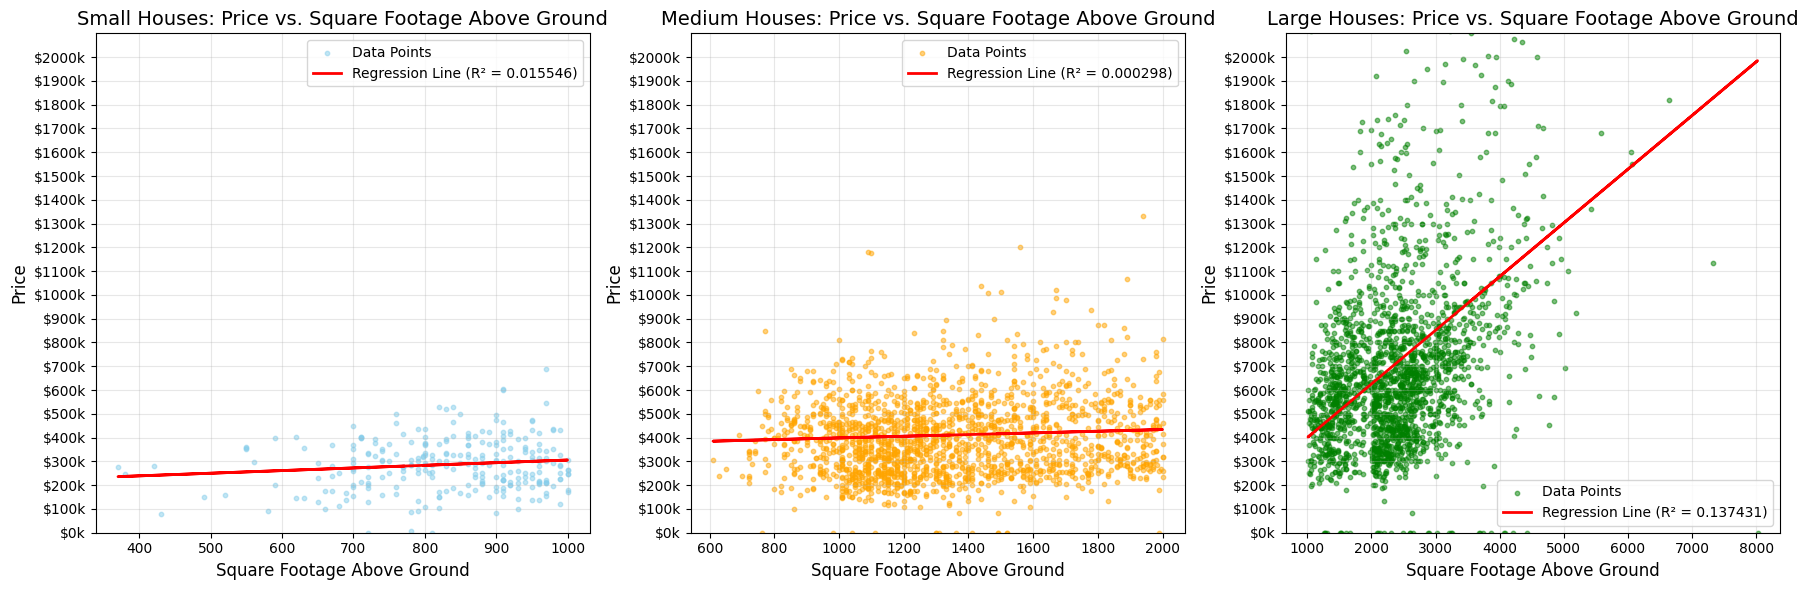

In [ ]:
# Price vs. Square Footage Above Ground with Regression Line
categories = ['Small', 'Medium', 'Large']
colors = ['skyblue', 'orange', 'green']

plt.figure(figsize=(18, 6))

for i, category in enumerate(categories):
    plt.subplot(1, 3, i + 1)
    filtered_category = filtered_df[filtered_df['house_size_category'] == category]
    X = filtered_category['sqft_above'].values.reshape(-1, 1)
    y = filtered_category['price'].values

    if len(np.unique(X)) > 1 and len(X) > 1:  # Ensure valid regression data
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r_squared = f"{model.score(X, y):.6f}"  # Fixed-point format, no scientific notation

        plt.scatter(X, y, alpha=0.5, c=colors[i], s=10, label='Data Points')
        plt.plot(X, y_pred, color='red', linewidth=2, label=f'Regression Line (R² = {r_squared})')
    else:
        plt.scatter(X, y, alpha=0.5, c=colors[i], s=10, label='Data Points')
        plt.text(0.5, 0.5, 'Insufficient Data', fontsize=12, ha='center', transform=plt.gca().transAxes)

    plt.title(f'{category} Houses: Price vs. Square Footage Above Ground', fontsize=14)
    plt.xlabel('Square Footage Above Ground', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.yticks(ticks=range(0, 2100000, 100000), labels=[f"${x//1000}k" for x in range(0, 2100000, 100000)])
    plt.ylim(0, 2100000)
    plt.grid(alpha=0.3)
    plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

For **Small Houses**, square footage above ground has a negligible impact on price (\( R^2 = 0.015546 \)). In **Medium Houses**, the relationship remains minimal with little explanatory power (\( R^2 = 0.000298 \)). For **Large Houses**, there is a notable positive correlation, with square footage above ground explaining more variation in price (\( R^2 = 0.137431 \)).

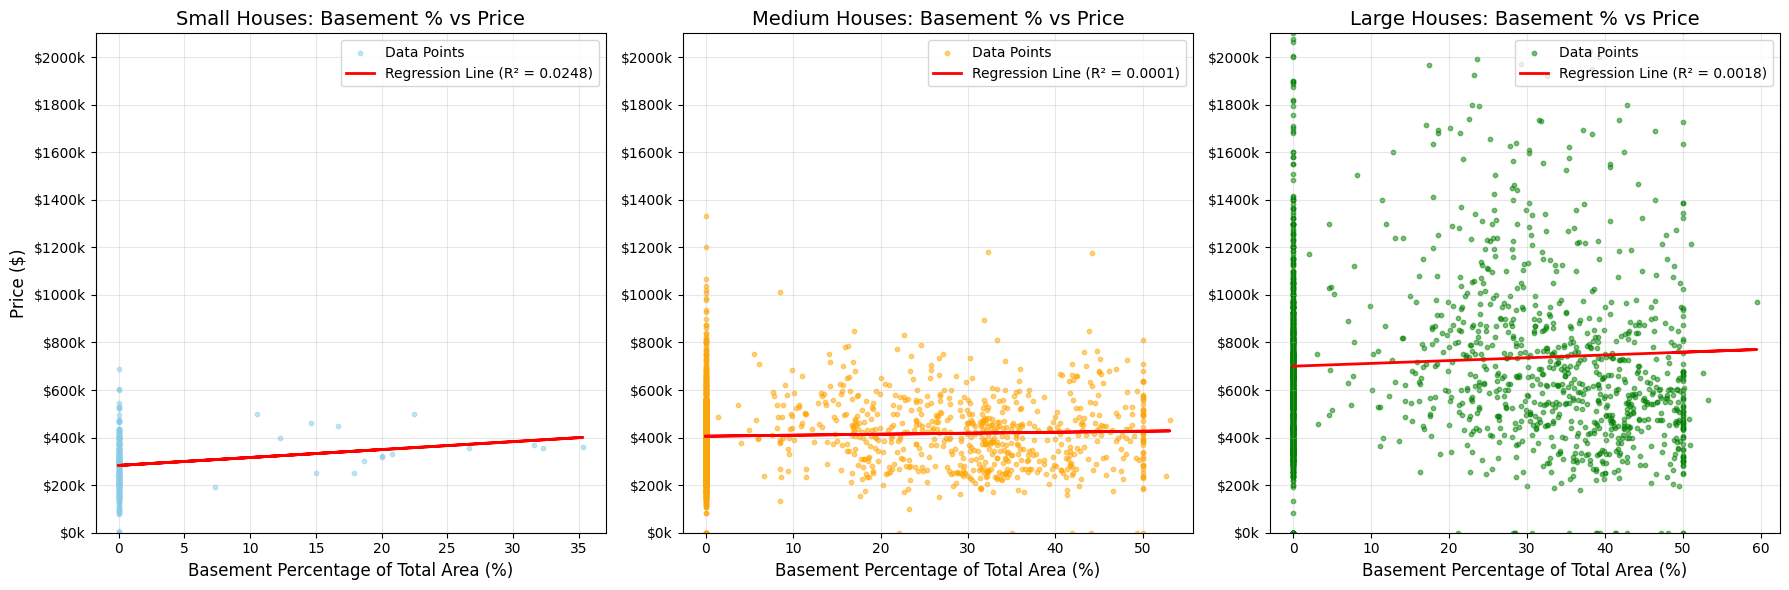

In [ ]:
#Basement Size to Living Space Size vs Price
categories = ['Small', 'Medium', 'Large']
colors = ['skyblue', 'orange', 'green']

plt.figure(figsize=(18, 6))

for i, category in enumerate(categories):
    plt.subplot(1, 3, i + 1)
    filtered_category = filtered_df[filtered_df['house_size_category'] == category].copy()
    filtered_category['basement_pct'] = (filtered_category['sqft_basement'] / filtered_category['sqft_living']) * 100

    X = filtered_category['basement_pct'].values.reshape(-1, 1)
    y = filtered_category['price'].values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r_squared = round(model.score(X, y), 4)

    plt.scatter(X, y, alpha=0.5, c=colors[i], s=10, label='Data Points')
    plt.plot(X, y_pred, color='red', linewidth=2, label=f'Regression Line (R² = {r_squared})')

    plt.title(f'{category} Houses: Basement % vs Price', fontsize=14)
    plt.xlabel('Basement Percentage of Total Area (%)', fontsize=12)
    if i == 0:
        plt.ylabel('Price ($)', fontsize=12)

    plt.ylim(0, 2100000)
    plt.yticks(ticks=range(0, 2100000, 200000), labels=[f"${x//1000}k" for x in range(0, 2100000, 200000)])
    plt.grid(alpha=0.3)
    plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

Basement size shows minimal impact on prices across all house categories, with weak positive trends for small (**R² = 0.0248**) and large houses (**R² = 0.0018**) and almost no correlation for medium houses (**R² = 0.0001**).

# **5.4) Categorical Features**

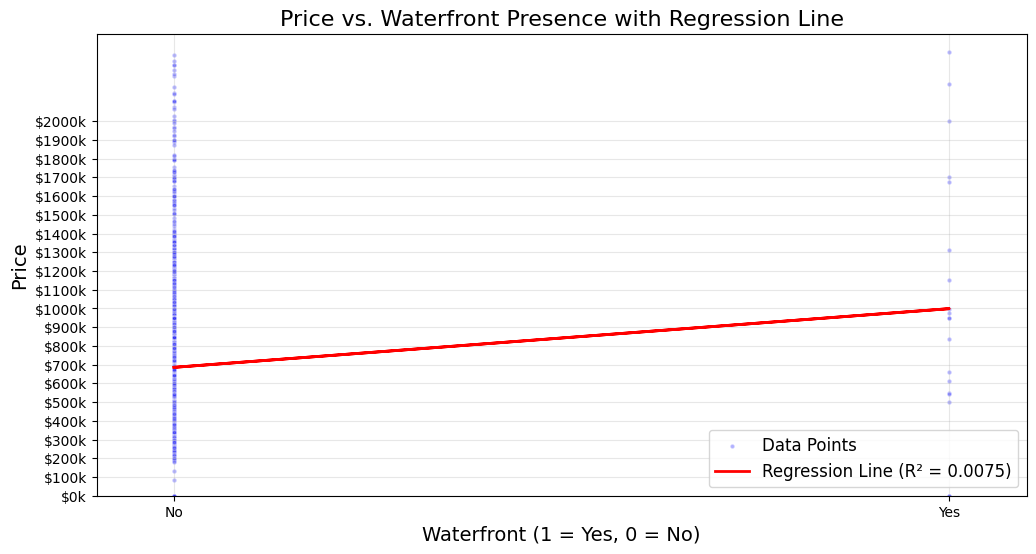

In [ ]:
# Price vs. Waterfront (Binary) with Regression Line

price_threshold = filtered_df['price'].quantile(0.99)
filtered_df_no_outliers = filtered_df[filtered_df['price'] <= price_threshold]

X = filtered_df_no_outliers['waterfront'].values.reshape(-1, 1)
y = filtered_df_no_outliers['price'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r_squared = round(model.score(X, y), 4)

plt.figure(figsize=(12, 6))
plt.scatter(X, y, alpha=0.3, c='blue', s=10, edgecolor='w', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label=f'Regression Line (R² = {r_squared})')

plt.title('Price vs. Waterfront Presence with Regression Line', fontsize=16)
plt.xlabel('Waterfront (1 = Yes, 0 = No)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.xlim(-0.1, 1.1)
plt.ylim([0, y.max() + 100000])
plt.yticks(ticks=range(0, 2100000, 100000), labels=[f"${x//1000}k" for x in range(0, 2100000, 100000)])
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

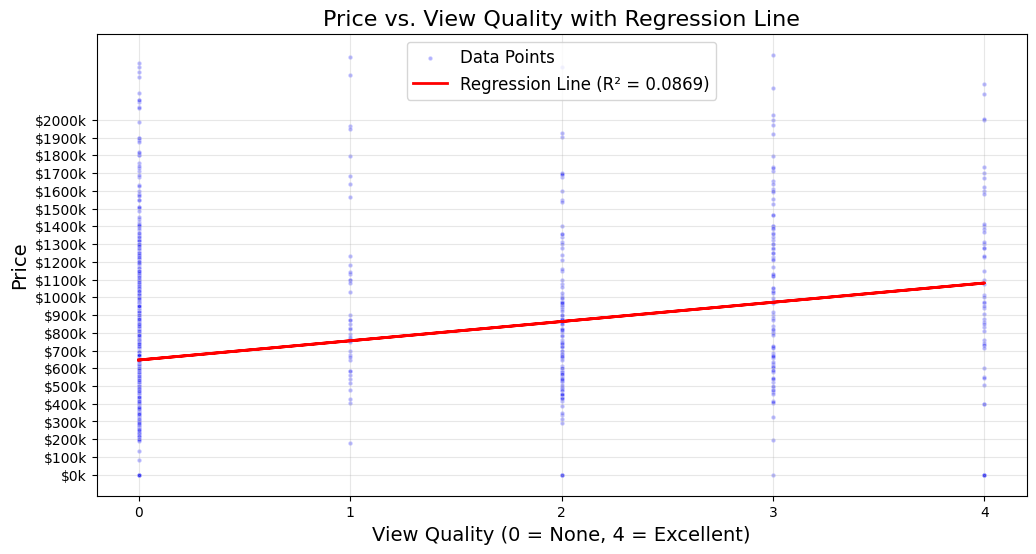

In [ ]:
# Price vs. View Quality with Regression Line
price_threshold = filtered_df['price'].quantile(0.99)
filtered_df_no_outliers = filtered_df[filtered_df['price'] <= price_threshold]

X = filtered_df_no_outliers['view'].values.reshape(-1, 1)
y = filtered_df_no_outliers['price'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r_squared = round(model.score(X, y), 4)

plt.figure(figsize=(12, 6))
plt.scatter(X, y, alpha=0.3, c='blue', s=10, edgecolor='w', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label=f'Regression Line (R² = {r_squared})')

plt.title('Price vs. View Quality with Regression Line', fontsize=16)
plt.xlabel('View Quality (0 = None, 4 = Excellent)', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.xticks(ticks=range(0, 5, 1), labels=[str(x) for x in range(0, 5, 1)])
plt.yticks(ticks=range(0, 2100000, 100000), labels=[f"${x//1000}k" for x in range(0, 2100000, 100000)])
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

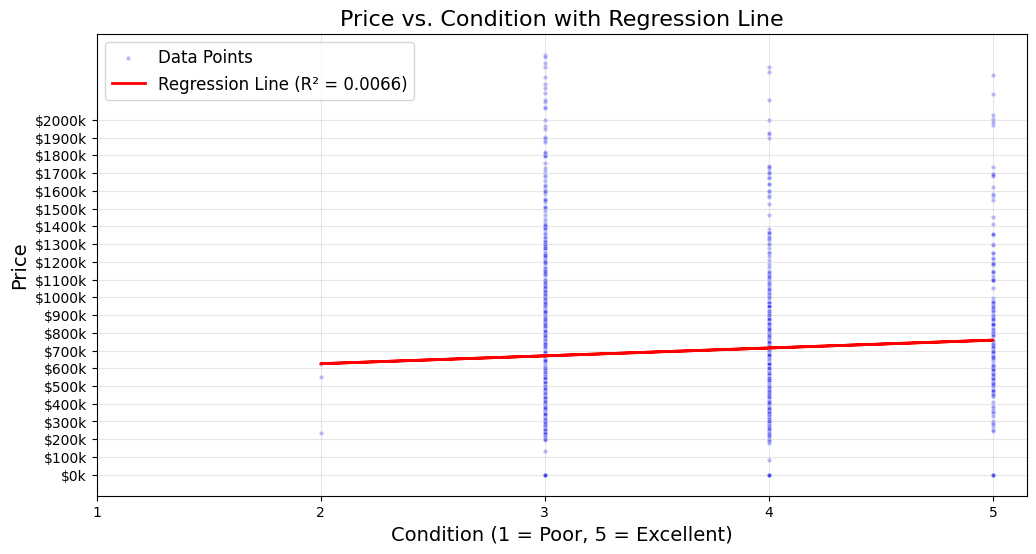

In [ ]:
# Price vs. Condition with Regression Line
price_threshold = filtered_df['price'].quantile(0.99)
filtered_df_no_outliers = filtered_df[filtered_df['price'] <= price_threshold]

X = filtered_df_no_outliers['condition'].values.reshape(-1, 1)
y = filtered_df_no_outliers['price'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r_squared = round(model.score(X, y), 4)

plt.figure(figsize=(12, 6))
plt.scatter(X, y, alpha=0.3, c='blue', s=10, edgecolor='w', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label=f'Regression Line (R² = {r_squared})')

plt.title('Price vs. Condition with Regression Line', fontsize=16)
plt.xlabel('Condition (1 = Poor, 5 = Excellent)', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.xticks(ticks=range(1, 6, 1), labels=[str(x) for x in range(1, 6, 1)])
plt.yticks(ticks=range(0, 2100000, 100000), labels=[f"${x//1000}k" for x in range(0, 2100000, 100000)])
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

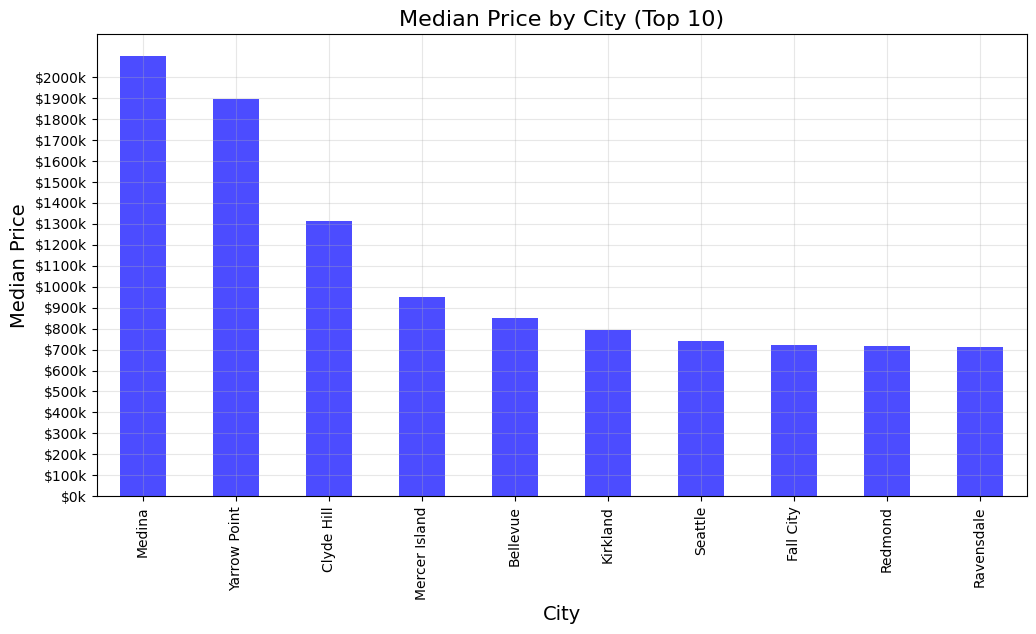

In [ ]:
# Price by City with Bar Plot (Top 10 Cities by Frequency)
city_price = filtered_df.groupby('city')['price'].median().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
city_price.plot(kind='bar', color='blue', alpha=0.7)

plt.title('Median Price by City (Top 10)', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Median Price', fontsize=14)
plt.grid(alpha=0.3)
plt.yticks(ticks=range(0, 2100000, 100000), labels=[f"${x//1000}k" for x in range(0, 2100000, 100000)])
plt.show()


1. **Key Observations:**
   - The cities in the top 10 display significant variance, with Medina and Clyde Hill commanding nearly double the median price of lower-ranked cities in this group.
   - Housing markets in these cities are likely influenced by location, amenities, and affluent demographics.

# **6) Modeling & Interpretations**

To predict house prices, I utilized multiple regression models to determine the best-performing one for this prediction task. I split the data into an 80-20 train-test split, training the models on 80% of the data and evaluating their performance on the remaining 20%. Below are the necessary imports and steps for modeling.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
import warnings

#### Baseline Model

To evaluate the success of each model, I compared their performance metrics, such as the Mean Squared Error (MSE), against a baseline model. The baseline assumes that all predictions are the mean of the target variable (house prices).

In [ ]:
# Set up Baseline Model using mean house price
y = df['price']
baseline_preds = np.ones(len(y)) * y.mean()
baseline_mse = mean_squared_error(y, baseline_preds)
print(f"Baseline MSE: {baseline_mse}")


Baseline MSE: 340607582293.6892


#### Multiple Regression Model


I chose to build a multiple regression model to predict housing prices as I believed the independent variables could collectively influence the dependent variable (house prices). This approach allowed me to model the relationships between housing prices and various predictors while accounting for their combined effects.

In [ ]:
# Step 1: Prepare Features and Target (Removed house_size_category)
features = [
    'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition',
    'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors'
]
X = df[features]  # Features
y = df['price']   # Target variable

# Step 2: Split into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Encode Categorical Columns
cat_col = ['waterfront']  # Only 'waterfront' is categorical
transformer = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False), cat_col),
    remainder='passthrough'
)

# Step 4: Create Pipeline for Linear Regression
pipe = Pipeline([
    ('encode', transformer),
    ('model', LinearRegression())
])

# Step 5: Fit the Pipeline
pipe.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_train_preds = pipe.predict(X_train)
y_test_preds = pipe.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_preds)
test_mse = mean_squared_error(y_test, y_test_preds)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

# Step 7: Retrieve Feature Importance (Linear Coefficients)
encoded_columns = transformer.named_transformers_['onehotencoder'].get_feature_names_out(cat_col)
all_columns = list(encoded_columns) + [col for col in X.columns if col not in cat_col]

coefficients = pipe.named_steps['model'].coef_
feature_importance = pd.DataFrame({
    'Feature': all_columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("Feature Importance:")
print(feature_importance)

Training MSE: 325244581919.91205
Testing MSE: 70343620397.04169
Feature Importance:
         Feature    Coefficient
0   waterfront_1  434126.408565
4      condition   51142.641094
3           view   42876.838434
8      bathrooms   18810.623626
9         floors    6254.869812
1    sqft_living     188.198574
6  sqft_basement      96.620387
5     sqft_above      91.578190
2       sqft_lot      -0.722093
7       bedrooms  -62091.153560


The model shows that **waterfront**, **condition**, and **view** positively impact prices, while **sqft_living** and **bathrooms** have smaller effects. Surprisingly, **bedrooms** negatively affect price. **Sqft_lot** shows minimal influence. These relationships may differ by house size, suggesting that separating homes by size could improve model accuracy and capture distinct trends more effectively.

#### K-Nearest Neighbors Regression Model

 The K-Nearest Neighbors (KNN) regression model to predict categorized house prices, as KNN captures localized relationships by comparing instances with similar feature patterns. This approach is particularly suitable given the varying relationships between housing features and prices observed in the data.

In [ ]:
# Suppress UserWarnings related to unknown categories
warnings.filterwarnings('ignore', category=UserWarning)

# Step 1: Define house size categories
# Define bins for Small, Medium, Large houses
bins = [0, 1000, 2000, float('inf')]
labels = ['Small', 'Medium', 'Large']

# Create house_size_category column
df['house_size_category'] = pd.cut(df['sqft_living'], bins=bins, labels=labels)

# Step 2: Initialize categories and results list
categories = ['Small', 'Medium', 'Large']
results = []

# Step 3: Loop through each category
for category in categories:
    print(f"Training model for {category} houses...\n")

    # Filter data for the current category
    filtered_df = df[df['house_size_category'] == category].copy()

    # Check if filtered_df has enough data
    if filtered_df.shape[0] < 10:
        print(f"Skipping {category} due to insufficient data.\n")
        continue

    # Step 4: Define X and y
    X = filtered_df[[ 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition',
    'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors']]
    y = filtered_df['price']

    # Handle potential NaN values
    X = X.dropna()
    y = y.loc[X.index]

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 5: Encode categorical column and scale numerical data
    cat_col = ['waterfront']
    transformer = make_column_transformer(
        (OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_col),
        remainder=StandardScaler()
    )

    # Step 6: Create pipeline for KNN regression
    pipe = Pipeline([
        ('encode', transformer),
        ('model', KNeighborsRegressor())
    ])

    # Define hyperparameter grid
    param_grid = {'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50, 60, 70 , 80, 90, 100, 125, 150, 175, 200, 300, 400, 500, 750]}

    # Step 7: Perform GridSearchCV
    grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=0)
    grid_search.fit(X_train, y_train)

    # Best model
    knn = grid_search.best_estimator_

    # Step 8: Calculate MSE
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Step 9: Feature Importance using Permutation Importance
    r = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)
    feature_importance_df = pd.DataFrame(
        r['importances_mean'],
        index=X.columns,
        columns=['Importance']
    ).sort_values(by="Importance", ascending=False)

    # Print Results
    print(f"{category} Category - MSE: {mse:.2f}")
    print("Feature Importance:")
    print(feature_importance_df)
    print("\n" + "-"*50 + "\n")

    # Append results
    results.append({
        'Category': category,
        'MSE': mse,
        'Best Parameters': grid_search.best_params_,
        'Feature Importance': feature_importance_df
    })

# Step 10: Display results
print("Final Results:")
for res in results:
    print(f"Category: {res['Category']}, MSE: {res['MSE']:.2f}, Best n_neighbors: {res['Best Parameters']['model__n_neighbors']}")

Training model for Small houses...

Small Category - MSE: 12272415941.68
Feature Importance:
               Importance
sqft_lot         0.112149
bedrooms         0.044553
view             0.020443
floors           0.009395
sqft_basement    0.002512
waterfront       0.000000
bathrooms       -0.015377
sqft_above      -0.022923
sqft_living     -0.025242
condition       -0.040262

--------------------------------------------------

Training model for Medium houses...

Medium Category - MSE: 28147485142.69
Feature Importance:
               Importance
condition        0.007883
view             0.003124
floors           0.001563
sqft_lot         0.001465
waterfront       0.000000
bathrooms       -0.000298
bedrooms        -0.000504
sqft_above      -0.000609
sqft_living     -0.004971
sqft_basement   -0.005319

--------------------------------------------------

Training model for Large houses...

Large Category - MSE: 94790353435.80
Feature Importance:
               Importance
sqft_living    

Surprisingly, living area square footage, which was dominant in earlier models, holds less weight here. For **Small houses**, lot size is as the most significant predictor, suggesting that land availability plays a critical role in determining the value of smaller homes. Perhaps those who buys medium size houses have more family members and hence bathroom and condition is more important to them. As a result, the home value is greater. For **Large houses**, living area square footage is the primary driver of price as expansive living space becomes a premium. These insights show how the KNN model effectively captures the hidden relationships between house characteristics and price. By segmenting houses into categories, we observe that the relative importance of features varies significantly with house size.

#### Decision Tree Regression Model

I chose to build a decision tree regression model because, like K-Nearest Neighbors, decision trees can capture non-linear relationships within the housing data. Additionally, they provide a clear and interpretable structure for decision-making, making it easy to understand how the model predicts house prices based on feature values.


Training model for Small houses...

Best Depth for Small: 2


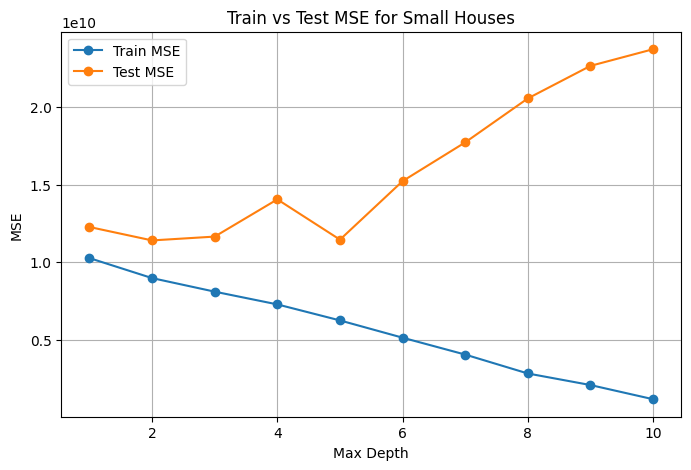

Small Category - MSE: 11412211324.21
Feature Importance:
                             Importance
remainder__sqft_living         0.394429
onehotencoder__waterfront_1    0.035086
remainder__sqft_lot            0.000000
remainder__view                0.000000
remainder__condition           0.000000
remainder__sqft_above          0.000000
remainder__sqft_basement       0.000000
remainder__bedrooms            0.000000
remainder__bathrooms           0.000000
remainder__floors              0.000000
--------------------------------------------------

Training model for Medium houses...

Best Depth for Medium: 1


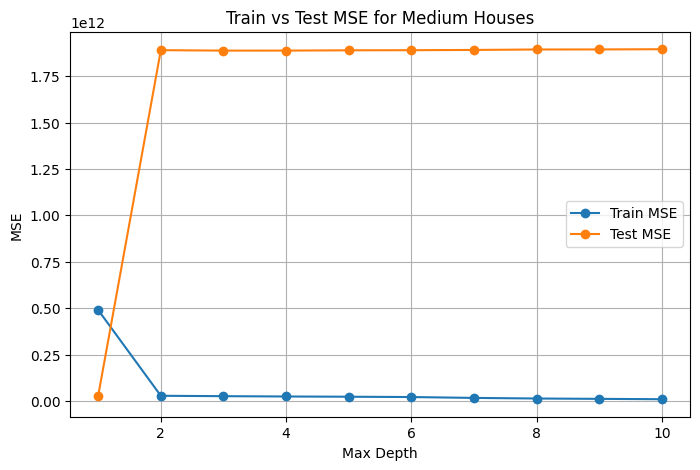

Medium Category - MSE: 28867710503.02
Feature Importance:
                             Importance
remainder__sqft_living         0.065566
onehotencoder__waterfront_1    0.000000
remainder__sqft_lot            0.000000
remainder__view                0.000000
remainder__condition           0.000000
remainder__sqft_above          0.000000
remainder__sqft_basement       0.000000
remainder__bedrooms            0.000000
remainder__bathrooms           0.000000
remainder__floors              0.000000
--------------------------------------------------

Training model for Large houses...

Best Depth for Large: 3


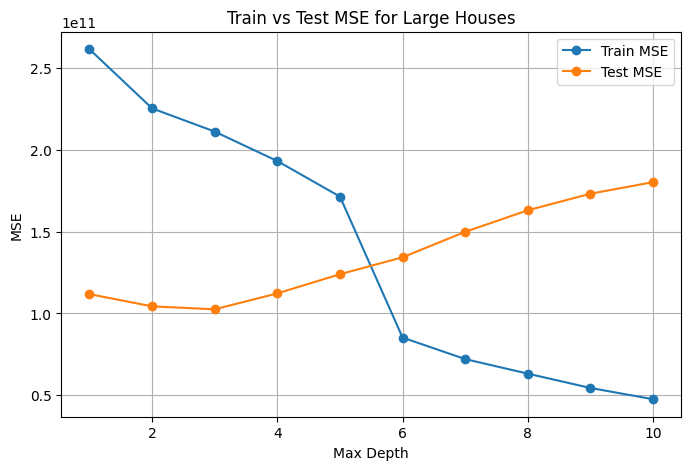

Large Category - MSE: 102527699206.23
Feature Importance:
                             Importance
onehotencoder__waterfront_1    0.739977
remainder__view                0.036739
remainder__sqft_living         0.000000
remainder__sqft_lot            0.000000
remainder__condition           0.000000
remainder__sqft_above          0.000000
remainder__sqft_basement       0.000000
remainder__bedrooms            0.000000
remainder__bathrooms           0.000000
remainder__floors              0.000000
--------------------------------------------------

Final Results:
Category: Small, Best Depth: 2, MSE: 11412211324.21
Category: Medium, Best Depth: 1, MSE: 28867710503.02
Category: Large, Best Depth: 3, MSE: 102527699206.23


In [ ]:
# Step 1: Define house size categories
bins = [0, 1000, 2000, float('inf')]
labels = ['Small', 'Medium', 'Large']
df['house_size_category'] = pd.cut(df['sqft_living'], bins=bins, labels=labels)

# Step 2: Initialize categories and results list
categories = ['Small', 'Medium', 'Large']
results = []

# Step 3: Loop through each category
for category in categories:
    print(f"\nTraining model for {category} houses...\n")

    # Filter data for the current category
    filtered_df = df[df['house_size_category'] == category].copy()

    # Check for sufficient data
    if filtered_df.shape[0] < 10:
        print(f"Skipping {category} due to insufficient data.")
        continue

    # Define X and y
    X = filtered_df[[ 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition',
    'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors']]
    y = filtered_df['price']
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 4: Preprocess data
    cat_col = ['waterfront']
    transformer = make_column_transformer(
        (OneHotEncoder(drop='first', sparse_output=False), cat_col),
        remainder=StandardScaler()
    )

    # Step 5: Train Decision Tree Regressor
    best_mse = float('inf')
    best_depth = 0
    train_scores = []
    test_scores = []

    for d in range(1, 11):  # Loop to find optimal max_depth
        pipe = Pipeline([
            ('encode', transformer),
            ('model', DecisionTreeRegressor(max_depth=d, random_state=42))
        ])
        pipe.fit(X_train, y_train)
        y_train_preds = pipe.predict(X_train)
        y_test_preds = pipe.predict(X_test)

        train_mse = mean_squared_error(y_train, y_train_preds)
        test_mse = mean_squared_error(y_test, y_test_preds)

        train_scores.append(train_mse)
        test_scores.append(test_mse)

        if test_mse < best_mse:
            best_mse = test_mse
            best_depth = d
            best_model = pipe

    # Step 6: Evaluate final model
    print(f"Best Depth for {category}: {best_depth}")
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Feature Importance
    r = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
    feature_importance_df = pd.DataFrame(
        r['importances_mean'],
        index=best_model.named_steps['encode'].get_feature_names_out(),
        columns=['Importance']
    ).sort_values(by="Importance", ascending=False)

    # Append results
    results.append({
        'Category': category,
        'Best Depth': best_depth,
        'MSE': mse,
        'Feature Importance': feature_importance_df
    })

    # Plot train vs test MSE for depth
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), train_scores, marker='o', label='Train MSE')
    plt.plot(range(1, 11), test_scores, marker='o', label='Test MSE')
    plt.title(f"Train vs Test MSE for {category} Houses")
    plt.xlabel("Max Depth")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid()
    plt.show()

    print(f"{category} Category - MSE: {mse:.2f}")
    print("Feature Importance:")
    print(feature_importance_df)
    print("-" * 50)

# Step 7: Display final results
print("\nFinal Results:")
for res in results:
    print(f"Category: {res['Category']}, Best Depth: {res['Best Depth']}, MSE: {res['MSE']:.2f}")

While my decision tree regression model demonstrated good performance, its results varied across house size categories. For **small houses**, with **sqft_living** as the highest predictor, the model achieved the lowest mean squared error (MSE) of **11.4 billion** with a depth of 2. **Medium houses**, also with **sqft_living** as the most important feature, had an MSE of **28.9 billion**. For **large houses**, **waterfront** status emerged as the most significant predictor, resulting in an MSE of **102.5 billion**. Compared to the KNN model, the decision tree provided clearer insights into feature contributions but lacked the flexibility to generalize complex, non-linear relationships.


#### Random Forest Regression Model ####

In [ ]:
# Step 1: Define house size categories
bins = [0, 1000, 2000, float('inf')]
labels = ['Small', 'Medium', 'Large']
df['house_size_category'] = pd.cut(df['sqft_living'], bins=bins, labels=labels)

# Step 2: Prepare Features and Target
features = [
    'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition',
    'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors'
]
target = 'price'

# Step 3: Set up Pipeline for Random Forest
cat_col = ['waterfront']  # Categorical column
transformer = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False), cat_col),
    remainder='passthrough'
)

# Random Forest Pipeline
pipe = Pipeline([
    ('encode', transformer),
    ('model', RandomForestRegressor(random_state=20))
])

# Step 4: Hyperparameter Grid
param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [3, 4, 5]
}

# Step 5: Train and Evaluate Model for Each House Size Category
for category in ['Small', 'Medium', 'Large']:
    print(f"\n=== Results for {category} Houses ===")

    # Filter data for the current category
    df_filtered = df[df['house_size_category'] == category]
    X = df_filtered[features]
    y = df_filtered[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

    # Grid Search for Hyperparameter Tuning
    grid_search = GridSearchCV(pipe, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
    grid_search.fit(X_train, y_train)

    # Best model
    rf_model = grid_search.best_estimator_
    print("Best Parameters:", grid_search.best_params_)

    # Training and Testing MSE
    y_train_preds = rf_model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_preds)
    print("Training MSE:", train_mse)

    y_test_preds = rf_model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_preds)
    print("Testing MSE:", test_mse)

    # Feature Importance
    fitted_transformer = rf_model.named_steps['encode']
    encoded_features = fitted_transformer.named_transformers_['onehotencoder'].get_feature_names_out(cat_col)
    numeric_features = [col for col in features if col not in cat_col]
    all_feature_names = list(encoded_features) + numeric_features

    r = permutation_importance(rf_model, X_test, y_test, n_repeats=5, random_state=20, n_jobs=-1)
    feature_importance_df = pd.DataFrame({
        'Feature': all_feature_names,
        'Importance': r['importances_mean']
    }).sort_values(by='Importance', ascending=False)

    print("Feature Importance:")
    print(feature_importance_df)


=== Results for Small Houses ===
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'model__max_depth': 5, 'model__n_estimators': 50}
Training MSE: 5052826189.242623
Testing MSE: 12123115301.670586
Feature Importance:
         Feature  Importance
1    sqft_living    0.178526
0   waterfront_1    0.089990
8      bathrooms    0.010438
7       bedrooms    0.008856
6  sqft_basement    0.001560
3           view    0.000996
2       sqft_lot    0.000000
5     sqft_above   -0.003651
9         floors   -0.009582
4      condition   -0.018794

=== Results for Medium Houses ===
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'model__max_depth': 5, 'model__n_estimators': 50}
Training MSE: 140433948075.1819
Testing MSE: 45936226524.7443
Feature Importance:
         Feature  Importance
0   waterfront_1    1.457863
8      bathrooms    0.564259
5     sqft_above    0.166452
1    sqft_living    0.153286
3           view    0.011752
2       sqft_lot

The Random Forest model showed **waterfront** as the most influential feature across all house sizes. For **Small Houses**, `sqft_living` and `waterfront` were key, with Testing MSE at 12.12 billion. In **Medium Houses**, `waterfront`, `bathrooms`, and `sqft_above` dominated, with a Testing MSE of 45.94 billion. For **Large Houses**, `waterfront` and `view` were most important, with a Testing MSE of 106.94 billion. Model accuracy decreased with house size, reflecting greater price variability for larger properties.

# **7) Next Steps & Discussion**

#### Summary of Findings

In my analysis of housing prices, the models I constructed demonstrated significant improvement over the baseline predictor, confirming their utility and predictive strength. The models ranked in performance as follows: **Random Forest Regression, K-Nearest Neighbors Regression, Decision Tree Regression, and Multiple Linear Regression**.

**Key Findings:**

1. **Performance of Random Forest Model**: The Random Forest model demonstrated strong predictive capabilities, particularly for **medium** and **large houses**, achieving the best performance overall. It indicates that, any house with a waterfront, it will always have a high house value.

2. **Impactful Features**: For **small** and **medium houses**, **sqft_living** emerged as the key predictor of housing prices. For **large houses**, **waterfront** status played a significant role, though, **sqft_living** is still very important.

3. **Feature Contribution**: For **small houses**, they would want to maximize the size of the house over any other factors hence **sqft_living** and **sqft_lot** will be most important to them. For **medium houses**, those who buy might want to raise a family and want a good condition and a lot of bedrooms and bathrooms for them. Hence, they care about that the most and drive up the value of the house. For **large houses**, they care about luxurious amenities such as higher height from ground and having a waterfront or not.

In conclusion, the Random Forest model excelled by highlighting **sqft_living** and **waterfront** as critical factors overall. However, categorizing it show the nuanced features among each category.

#### Next Steps/Improvements

To enhance the predictive power of housing price models, I propose incorporating additional features and methodologies:

1. **Neighborhood-Specific Data**: Including data on neighborhood amenities, crime rates, school ratings, and proximity to transit or employment hubs could provide critical context, as these factors heavily influence property values.

2. **Energy Efficiency and Sustainability**: Information about energy-efficient features, such as solar panels or insulation.

By integrating these elements into future analyses, housing price models could yield more precise predictions and actionable insights for real estate professionals.